___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4247,4248,15677906,Owens,637,Spain,Female,54,5,0.000,1,0,1,150836.980,0
4268,4269,15709941,Feng,753,France,Male,46,8,0.000,3,1,0,90747.940,1
6067,6068,15675431,Chidimma,563,France,Female,34,6,0.000,2,0,0,36536.930,0
9272,9273,15583138,Persse,739,France,Male,42,2,141642.920,2,1,0,172149.760,0
6490,6491,15620751,Secombe,760,France,Male,34,2,0.000,2,1,0,164162.440,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
26,756,Germany,Male,36,2,136815.640,1,1,1,170041.950,0
8568,615,France,Male,64,0,81564.100,2,0,1,35896.090,0
6504,621,France,Male,32,1,0.000,2,1,1,168779.470,0
4442,676,France,Male,38,1,0.000,2,0,1,35644.790,0
9458,523,France,Male,36,8,158351.020,2,1,0,155304.530,0


<Figure size 864x432 with 0 Axes>

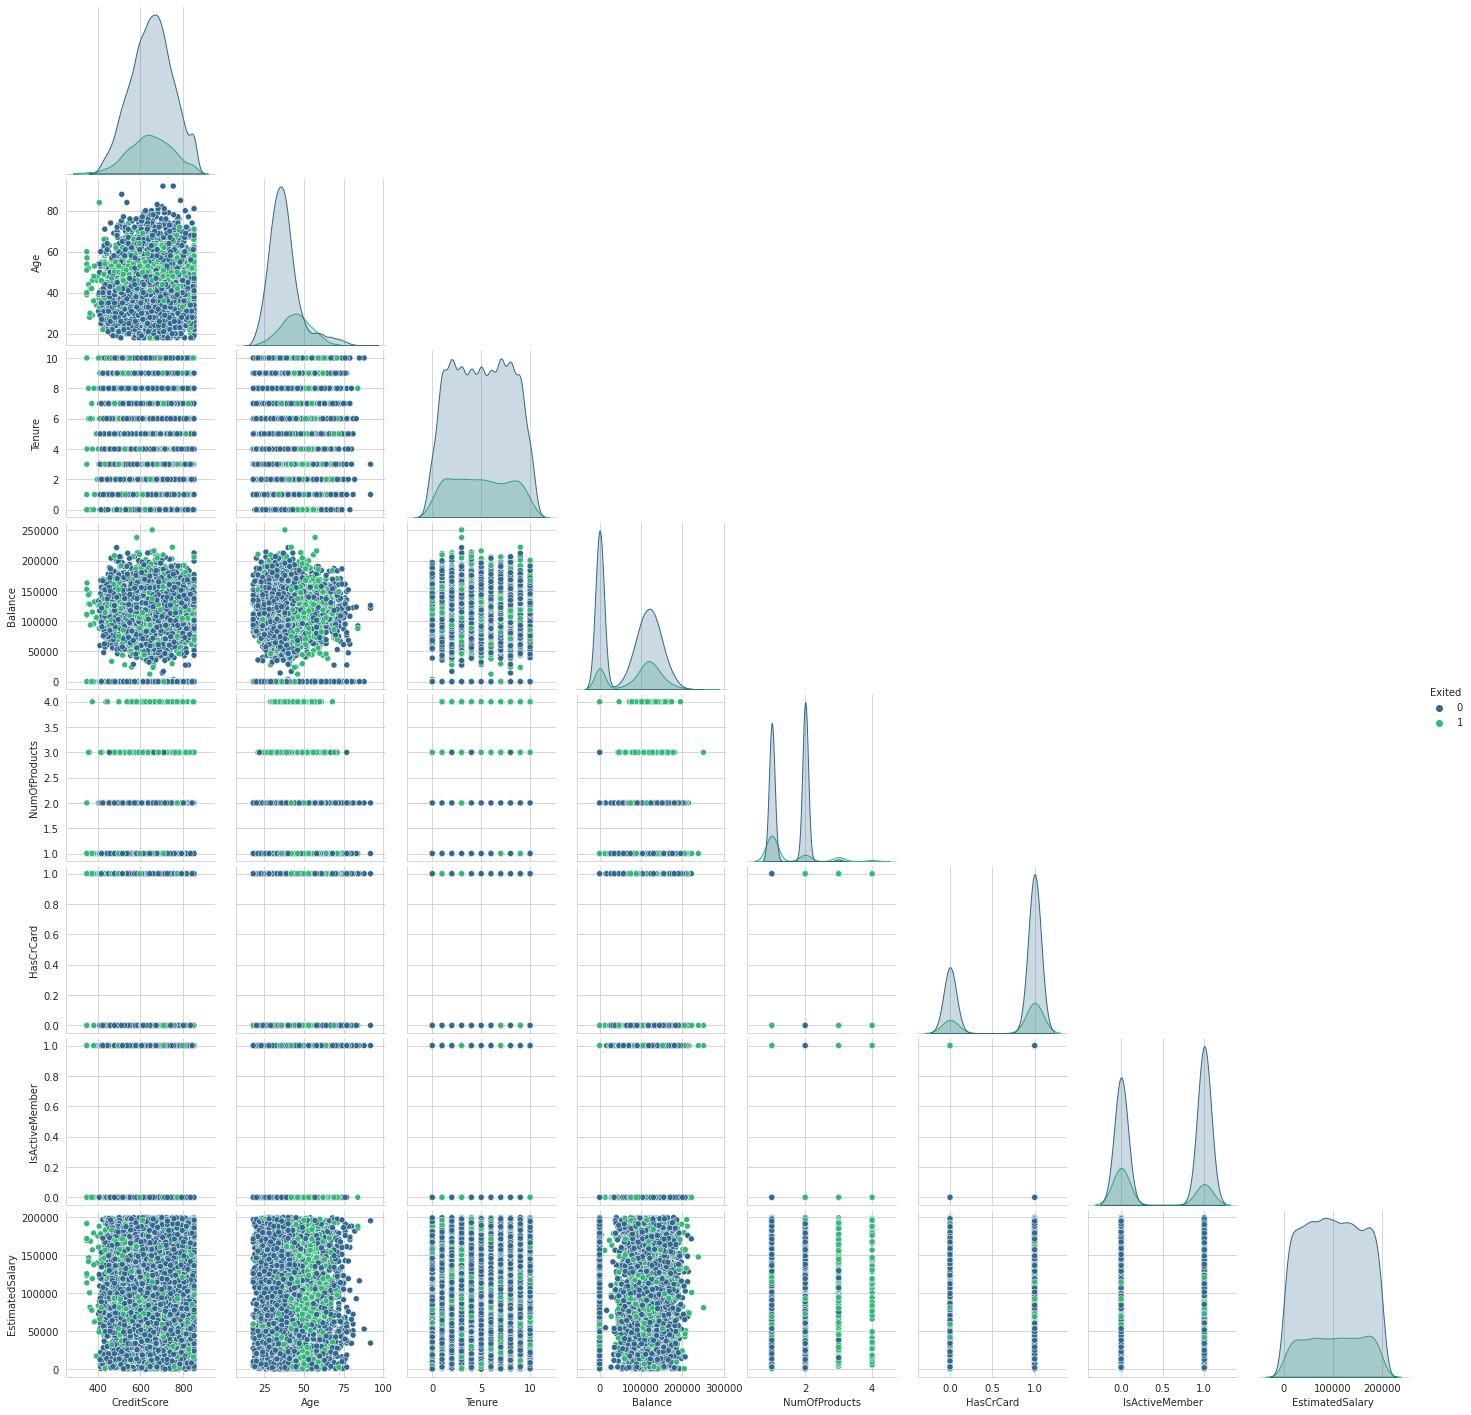

In [ ]:
plt.figure(figsize=(12, 6))

sns.pairplot(df,hue = "Exited", corner = True, palette="viridis");

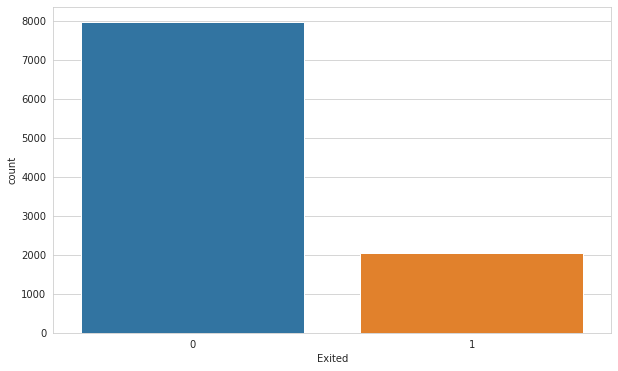

In [ ]:
sns.countplot(df.Exited);

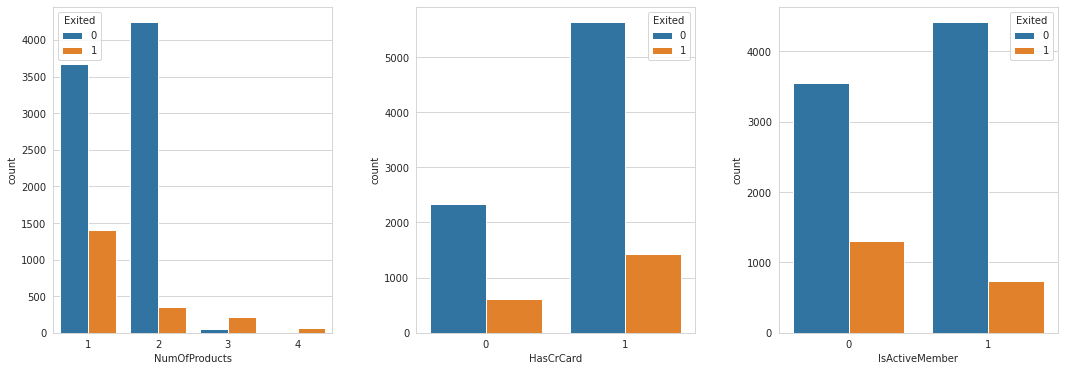

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2]);

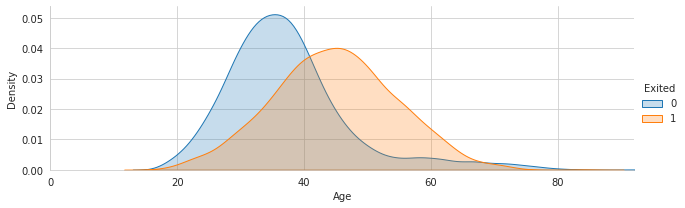

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

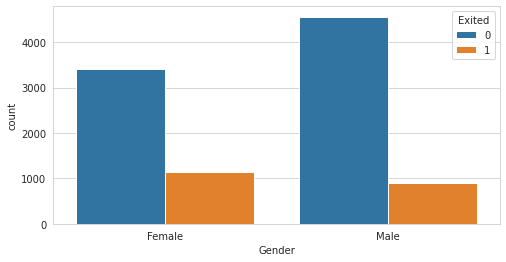

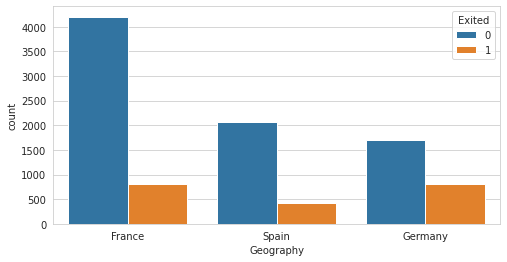

In [ ]:
plt.figure(figsize=(8, 4))

cat = df[['Geography','Gender']]
for i , predictor in enumerate(cat):
    plt.figure(i,figsize=(8, 4))
    sns.countplot(data = df, x=predictor, hue='Exited')

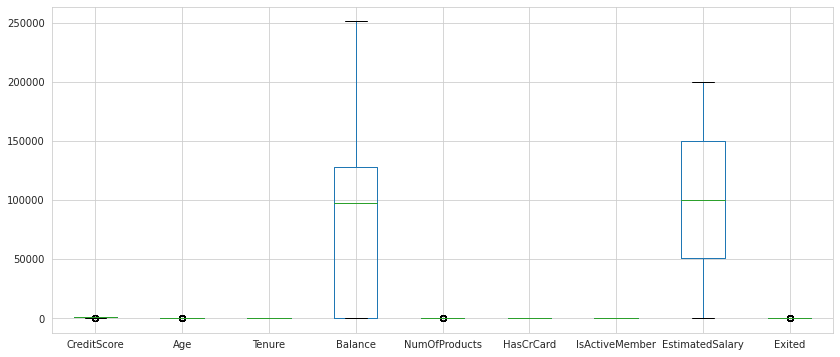

In [ ]:
plt.figure(figsize=(14, 6))

df.boxplot();

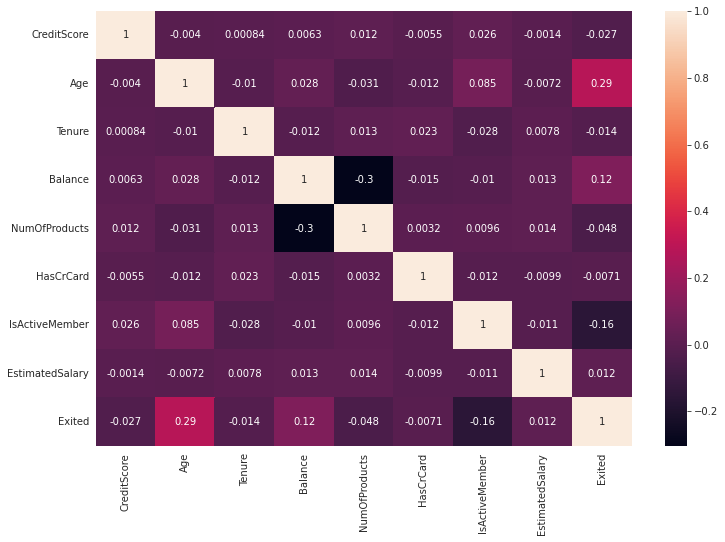

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5252,665,France,Female,44,7,0.000,2,1,1,66548.580,0
374,717,Germany,Male,35,7,58469.370,2,1,1,172459.390,0
552,685,Spain,Female,25,10,128509.630,1,1,0,121562.330,0
3778,579,Spain,Female,59,3,148021.120,1,1,1,74878.220,0
8310,702,Spain,Male,43,6,116121.670,1,1,0,61602.420,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
X = df.iloc[:,0:10]
y = df.iloc[:,-1]

In [ ]:
X.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9347,660,Spain,Female,36,0,84438.570,1,1,1,181449.510
8623,430,Germany,Female,38,8,153058.640,1,1,0,99377.270
1169,653,France,Female,38,8,102133.380,1,1,1,166520.960


In [ ]:
y.sample(3)

9023    0
6834    0
9302    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])], remainder='passthrough')
X= cat.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
X_test.shape

(2000, 13)

## without class_weigth

### Create The Model

In [ ]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.5002 - accuracy: 0.7943 - val_loss: 0.4813 - val_accuracy: 0.7950
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7964 - val_loss: 0.4684 - val_accuracy: 0.7950
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7983 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8086 - val_loss: 0.4289 - val_accuracy: 0.8075
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8196 - val_loss: 0.4298 - val_accuracy: 0.8062
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8224 - val_loss: 0.4170 - val_accuracy: 0.8112
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8301 - val_loss: 0.4118 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.500,0.794,0.481,0.795
1,0.473,0.796,0.468,0.795
2,0.457,0.798,0.449,0.800
3,0.436,0.809,0.429,0.808
4,0.423,0.820,0.430,0.806


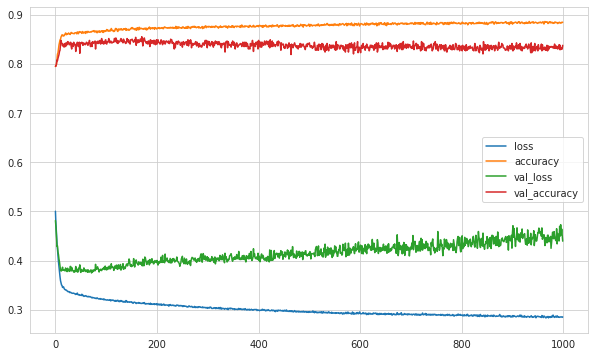

In [ ]:
loss_df.plot();

63/63 [==============================] - 0s 1ms/step


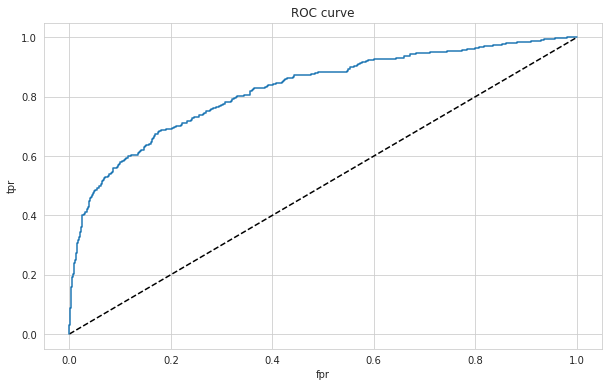

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.4118101894855499, 0.8554999828338623]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4118101894855499
accuracy :  0.8554999828338623


63/63 [==============================] - 0s 1ms/step


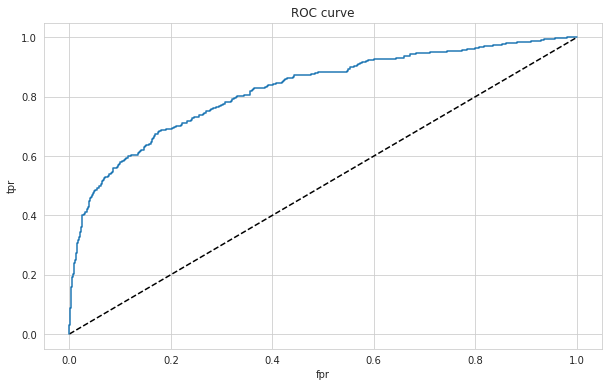

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7964 - val_loss: 0.4440 - val_accuracy: 0.7950
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8074 - val_loss: 0.4196 - val_accuracy: 0.8050
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8274 - val_loss: 0.3838 - val_accuracy: 0.8238
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8408 - val_loss: 0.3955 - val_accuracy: 0.8363
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8461 - val_loss: 0.3726 - val_accuracy: 0.8350
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8533 - val_loss: 0.3876 - val_accuracy: 0.8425
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8510 - val_loss: 0.3893 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.38696905970573425
accuracy :  0.8529999852180481


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1518   75]
 [ 219  188]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6169 - accuracy: 0.7494 - val_loss: 0.5455 - val_accuracy: 0.7950
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7932 - val_loss: 0.5211 - val_accuracy: 0.7950
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7964 - val_loss: 0.5054 - val_accuracy: 0.7950
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7961 - val_loss: 0.4973 - val_accuracy: 0.7950
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7964 - val_loss: 0.4913 - val_accuracy: 0.7950
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7967 - val_loss: 0.4839 - val_accuracy: 0.7950
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7976 - val_loss: 0.4802 - val_accuracy:

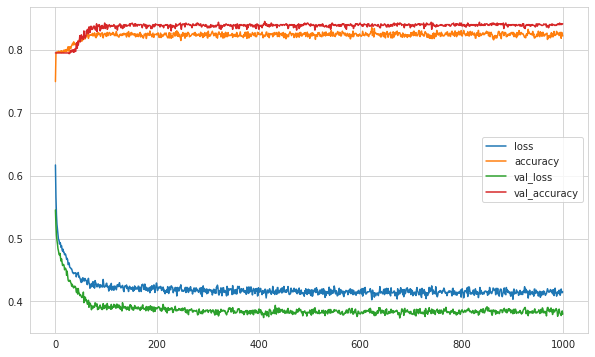

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Add Early Stop

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1, callbacks = [early_stop])

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7472 - val_loss: 0.4800 - val_accuracy: 0.7962
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7983 - val_loss: 0.4561 - val_accuracy: 0.7975
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8108 - val_loss: 0.4324 - val_accuracy: 0.8037
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8224 - val_loss: 0.4092 - val_accuracy: 0.8175
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8331 - val_loss: 0.3906 - val_accuracy: 0.8238
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8413 - val_loss: 0.3791 - val_accuracy: 0.8300
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8514 - val_loss: 0.3709 - val_accuracy: 0.8388

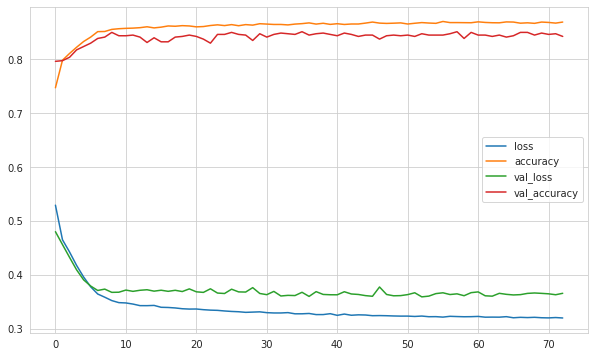

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Monitor the "val_loss" as metric

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34633737802505493
accuracy :  0.8579999804496765


#### Monitor the "val_recall" as metric

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1529   64]
 [ 220  187]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
113/113 [==============================] - 1s 3ms/step - loss: 0.4849 - accuracy: 0.7932 - val_loss: 0.4559 - val_accuracy: 0.7887
Epoch 2/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8071 - val_loss: 0.4317 - val_accuracy: 0.8112
Epoch 3/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8153 - val_loss: 0.4277 - val_accuracy: 0.8050
Epoch 4/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8193 - val_loss: 0.4218 - val_accuracy: 0.8125
Epoch 5/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8265 - val_loss: 0.4259 - val_accuracy: 0.8125
Epoch 6/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8310 - val_loss: 0.4140 - val_accuracy: 0.8188
Epoch 7/200
113/113 [==============================] - 0s 2ms/step - loss: 0.39

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9e0f4d0280>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
grid_model.best_score_

0.8601249999999998

In [ ]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
17,0.860,0.012,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
23,0.860,0.013,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
5,0.859,0.012,3,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
12,0.859,0.011,4,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
11,0.859,0.014,5,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
1,0.859,0.013,6,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.858,0.009,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.857,0.013,8,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.857,0.015,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
20,0.857,0.014,10,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."


In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1501   92]
 [ 194  213]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.70      0.52      0.60       407

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 1ms/step


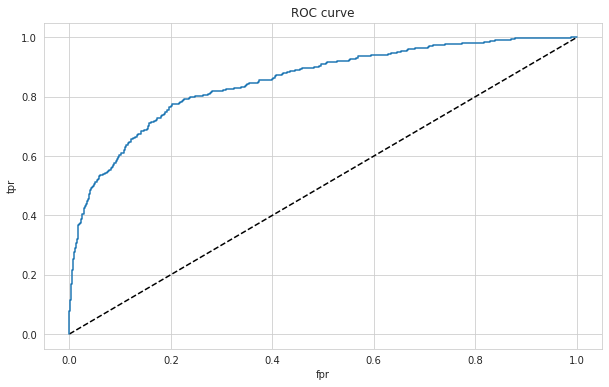

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8519521061893943

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("model_ann_churn", 'wb'))

In [ ]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.5052 - accuracy: 0.7924 - val_loss: 0.4631 - val_accuracy: 0.7965
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7993 - val_loss: 0.4517 - val_accuracy: 0.8020
Epoch 3/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8071 - val_loss: 0.4441 - val_accuracy: 0.8090
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8127 - val_loss: 0.4404 - val_accuracy: 0.8115
Epoch 5/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8123 - val_loss: 0.4367 - val_accuracy: 0.8085
Epoch 6/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8229 - val_loss: 0.4203 - val_accuracy: 0.8210
Epoch 7/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8279 - val_loss: 0.4150 - val_accuracy:

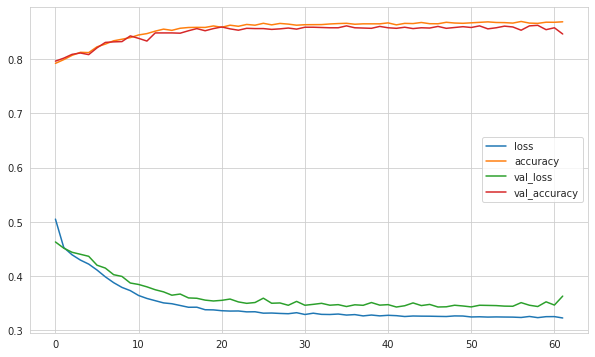

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.343187153339386
accuracy :  0.8569999933242798


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1530   63]
 [ 223  184]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
model.save('model_ann_churn.h5')

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___